<a href="https://colab.research.google.com/github/caeltarifa/convolutional_autoencoder_in_physics/blob/main/HIGH_ENERGY_PHYSICS_SIMULATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 PROTOTIPO GENERADOR DE RECTAS

## DEPENDENCIAS

In [ ]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as axes3d
import pylab
import os
import random
import math 

## FUNCIONES GEOMETRICAS

In [ ]:
#DETERMINA EL PARA METRO t DE R=A+tB PARA LAS ECUACIONES EN X Y Z
def determinar_t(plano, z0, pz):
    t=(plano - z0)/pz
    return t

def intersectar(x0,y0,px,py,t):
    x=x0+(t*px)
    y=y0+(t*py)
    return round(x,2), round(y,2)

def esta_dentro_plano(puntoxy):
    if ( (puntoxy[0]<50 and puntoxy[0]>-50) and (puntoxy[1]<50 and puntoxy[1]>-50) ):
        return True
    else:
        return False
def convertir_centimetros(lista):
    auxlista=list([])
    for e in lista:
        e=round(e*100,3)
        auxlista.append(e)
    return auxlista
  
def convertir_decimetros(lista):
    auxlista=list([])
    for e in lista:
        e=round(e*10,1)
        auxlista.append(e)
    return auxlista

def generar_archivo_experimento(nombre_archivo, listax, listay, listaz):
    listax.pop(0)
    listay.pop(0)
    listaz.pop(0)

    diccionario={
        'X': listax,
        'Y': listay,
        'Z': listaz,
    }
    #GUARDANDO EL VECTOR DE COORD_X COORD_Y COORD_Z EN EL ARCHIVO, LINEA A LINEA; CUANDO SE IMPRIMAN LAS 3 LINEAS DEJAMOS UNA LINEA EN BLANCO
    
    arch_nube_rastros = pd.DataFrame(diccionario, columns=['X','Y','Z'])

    arch_nube_rastros.to_csv(nombre_archivo)   
        
    #LA LINEA EN BLANCO NOS DICE QUE SE TRATA DE OTRO EXPERIMENTO O CASO DE ESTUDIO


from keras.datasets import mnist 

def graficar_rectas(arrayX, arrayY, arrayZ, i):
    ''' RECIBE EL VETOR_COORDENADAS_X / VECTOR_COORDENADAS_Y / VECTOR COORDENADAS_Z '''
    #print("coordenadas X >> plano 1 2 3 4 >>> ",arrayX)
    #print("coordenadas Y >> plano 1 2 3 4 >>> ",arrayX.shape)
    fig = plt.figure()
    '''DIBUJANDO LOS 4 PLANOS'''
    ax = fig.add_subplot(111, projection="3d")
    #ax = axes3d(fig)   
    X, Y = np.meshgrid(range(-50,50), range(-50,50)) #DIBUJAMOS AL AREA DE EN x-y CON COMBINACIONES EN LOS EJES ENTRE EL RAGO (-50,50)

    Z1 = np.zeros((100,100))+20 #ESTABLECIENDO LA ALTURA DEL PLANO 1 Z=20

    Z2=Z1+1 #ESTABLECIENDO LA ALTURA DEL PLANO 2 Z=21

    Z3=Z1+2 #ESTABLECIENDO LA ALTURA DEL PLANO 3 Z=22

    Z4=Z1+3 #ESTABLECIENDO LA ALTURA DEL PLANO 4 Z=23

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.plot_surface(X,Y, Z1, rstride=1, color='green')
    ax.plot_surface(X,Y, Z2, rstride=1, color='red')
    ax.plot_surface(X,Y, Z3, rstride=1, color='blue')
    ax.plot_surface(X,Y, Z4, rstride=1, color='yellow')

    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(0, 25)

    numero_rectas=int((arrayX[0].shape[0]-1)/4)#dividimos entre 4 pq tenemos '4' señales en los detectores debido a los '4' detectores

    contador_rectas=4 #determinar el numero de rectas que hay en este EVENTO
    for recta in range(0,numero_rectas):
        x = np.array([[ arrayX[0][0] ,arrayX[0][contador_rectas] ]]) #np.array([[-40,2]])
        y = np.array([[ arrayY[0][0] ,arrayY[0][contador_rectas] ]]) #np.array([[-40,6]])
        z = np.array([[ arrayZ[0][0] ,arrayZ[0][contador_rectas] ]]) #np.array([[5,25]])
        contador_rectas=contador_rectas+4
        # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
        # Es necesario que los datos esten contenidos en un array bi-dimensional
        '''DIBUJAR LA RECTA '''
        ax.plot_wireframe(x, y, z)
        '''IDENTIFICAR CON EL SIMBOLO "o" A TODOS LOS PUNTO'''
    
    ax.scatter(arrayX, arrayY, arrayZ, c='g', marker='o')
    
    #for ii in range(0,300):
    ax.view_init(elev=4.5, azim=310)
    fig.savefig("evento%d.png" % i)


def comparando_eliminacion_ruido(nombre_archivo, nombre_archivo_mejorado):
    archivo=pd.read_csv('randoms_rastros2.csv')
    archivo_mejorado=pd.read_csv('randoms_rastros2_mejorado.csv')

    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.scatter(archivo.X, archivo.Y, color="black")

    plt.subplot(2,1,2)
    plt.scatter(archivo_mejorado.X,archivo_mejorado.Y, color="blue")

    plt.tight_layout()
    plt.show()
    fig.savefig("evento1.png")

## VOLUMEN MATHUSLA

In [ ]:

#ARCHIVO PARA GUARDAR LAS RECTAS GENERADAS
dist = open("randoms_rectas.txt",'w+')


'''------BUSCANDO EL PRIMER PUNTO EN LA NUBE Z=20------'''
#numero de EXPIMENTOS a construir O SIMULAR
Num_experimentos=10

#Numero minimo y maximo de trazas por decaimiento
Num_min_trazas = 4
Num_max_trazas = 30

#Numero minimo que debe haber en un evento de desintegracion mejorado
Traza_restante=2

#numero de vectores canonicos alrededor del P0 para generar rectas
#----es mejor q sea aleatorio-----Num_vectores=20

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


'--------------------- APUNTES Y NOTAS------------------------'

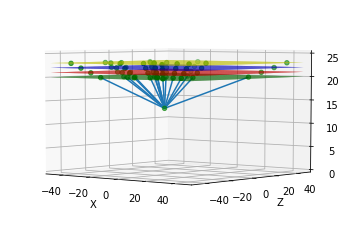

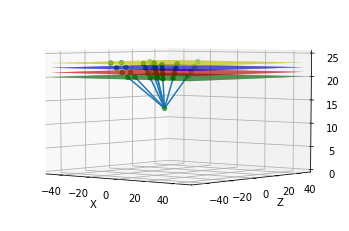

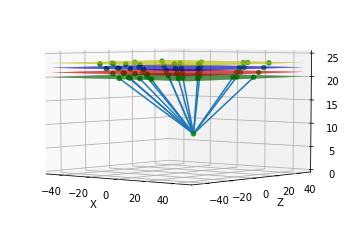

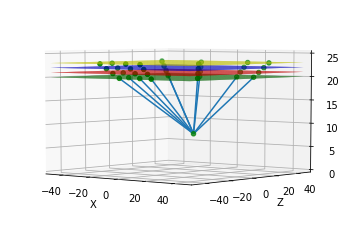

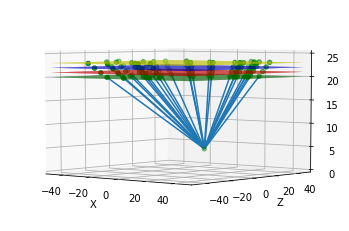

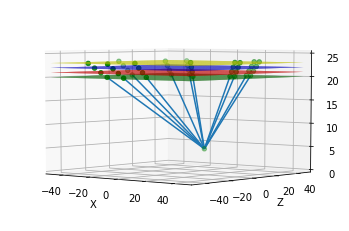

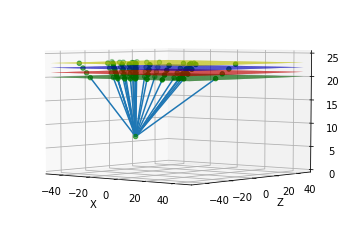

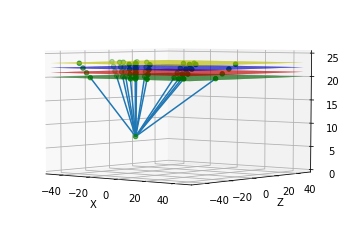

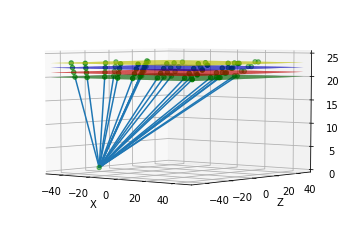

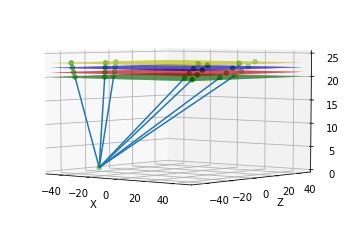

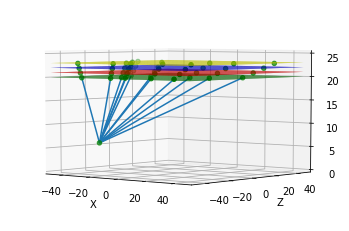

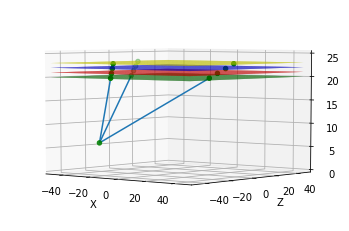

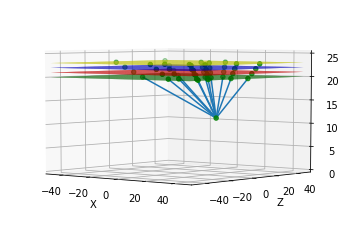

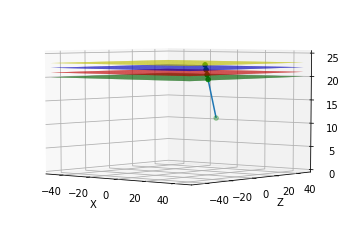

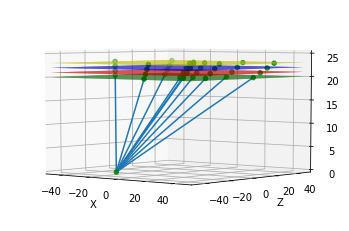

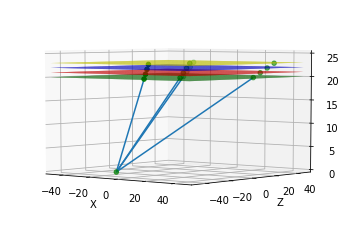

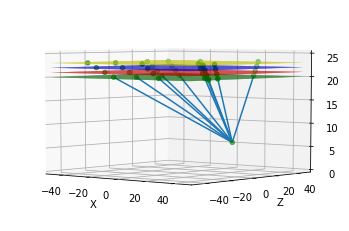

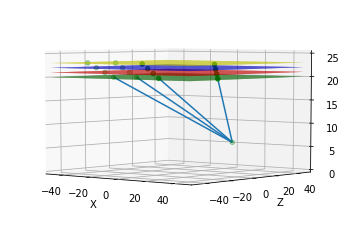

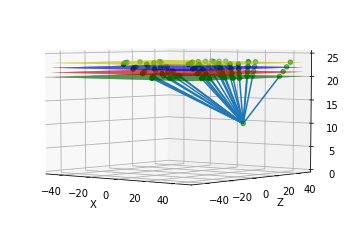

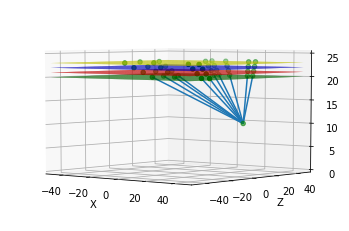

In [ ]:


lista_vertex=[]
lista_vertex_aleatorio=[]
for cont in range(0,Num_experimentos):
    '''---------ECUACION DE RECTA RECONSTRUIDA---------'''
    '''PUNTO INICIAL P0'''
    x0=round(random.uniform(-50, 50),3)
    y0=round(random.uniform(-50, 50),3)
    z0=round(random.uniform(0, 19),3)

    #agregando a lista EL VERTEX GENERADO ALEATORIAMENTE
    lista_vertex.append([x0,y0,z0])
    lista_vertex_aleatorio.append([x0 + round(random.uniform(-2, 2),3) ,y0 + round(random.uniform(-2, 2),3),z0 + round(random.uniform(-2, 2),3)])

    cont_vector_canonico=0 #reiniciando el contador de vetores directores

    #LISTAS VACIAS PARA GUARDAR TODOS LOS PUNTOS DE INTERSECCION EN LOS PLANOS Y CONFORMAR EL DATASET
    listax=list([x0])
    listay=list([y0])
    listaz=list([z0])

    #HACIENDO ALEATORIOS EL NUMERO DE VECTORES CANONICOS QUE PARTIRAN DESDE EL PUNTO ORIGEN P0 PARA GENERAR RECTAS
    Num_vectores=int(random.uniform(Num_min_trazas,Num_max_trazas))

    #PARA QUITAR ALEATORIAMENTE UN NUMERO DE RASTROS, ES DECIR: SI GENERAMOS 10 PISAS, ENTONCES QUITAMOS 3 ALEAORIAMENTE
    #ESTO GENERA EL CONJUNTO DE DATOS DE ENTRENAMIENTO 
    listax_mejorado=list([x0])
    listay_mejorado=list([y0])
    listaz_mejorado=list([z0])

    descuento_de_pista=int(Num_vectores*0.70)#reduccion del numero de pistas al 85%

    #Correccinoes forzoas en loa datos, para los casos: 
    #   1) cuando las diferencias entre el numero de vectores aleatorios y el descuento de vectores sea = 1 --> generará en el peor de los casos 1 recta en el arch_mejorado
    #   2) cuando las diferencias entre el numero de vectores aleatorios y el descuento de vectores sea = 0 --> generará en el peor de los casos 0 rectas en el arch_mejorado    
    if not (Num_vectores - descuento_de_pista > 1):
      descuento_de_pista=descuento_de_pista-1

    #for director in range<(0,5): #EN ESTE FOR BUSCAMOS VECTORES CANICOS ALEATORIOS ALREDEDOR DE  (X0, Y0, Z0)
    while cont_vector_canonico < Num_vectores:
        '''VECTOR CANONICO P'''
        px=round(random.uniform(-50, 50),4)
        py=round(random.uniform(-50, 50),4)
        pz=round(random.uniform(0, 20),4)
        
        linea = list([x0, y0, z0])
        linea = linea + list([px, py, pz])
        listplanos=list([23,22,21,20])
        
        vector_canonico_valido=True

        #lista para guardar los rastros intersectados, si el vec canonico no es valido no agregamos a nuestros vectores generales listax
        listax_temp=list([])
        listay_temp=list([])
        listaz_temp=list([])
        for plano in listplanos: 
            '''PLANO UBICADO EN LAS ALTURAS 23 22 21 20'''
            t= round(determinar_t(plano,z0, pz ), 5) # determinar la ctte t cuando intersecta en el plano (23,22,21,20) | redondeamos a 4 decimales para ganar presicion

            p_intersectado=list(intersectar(x0,y0,px,py,t)) #coordenadas X-Y del punto intersectado en el PLANO (23,22,21,20)
            
            if (esta_dentro_plano(p_intersectado) ):
                p_intersectado.append(plano) #'''PUNTO INTERSECTADO EN 3 COORDENADAS (i_x, i_y, i_z)''' //AGREGANDO LA COORDENADA DEL PLANO

                '''__guardando en listax: coordenadas X / listay: coordenadas Y / listaz: coordenadas Z __'''
                listax_temp.append(p_intersectado[0])
                listay_temp.append(p_intersectado[1])
                listaz_temp.append(p_intersectado[2])
                '''________'''

                p_intersectado.append(t) #AGREGANDO EL PARAMETRO CON EL QUE SE HA INTERSECTADO

                linea=linea+(p_intersectado)
            else:
                vector_canonico_valido=False
                break
        
        #IMPRIMIMOS LA LINEA CONFECCIONADA
        if (vector_canonico_valido):
            dist.write(str(linea) + "\n")
            
            cont_vector_canonico+=1
            '''SI ES UN VECTOR CANONICO VALIDO => agregamos "los cuatro puntos en los planos" a nuestra lista de coordenadas para mandarlo a imprimir'''
            listax=listax+listax_temp
            listay=listay+listay_temp
            listaz=listaz+listaz_temp

            #AQUI PUEDO QUITAR ALGUNAS AGRUPACIONES DE INTERSECCIONES "ALEATORIAMENTE"
            if random.choice([True, False]) and descuento_de_pista>0:
              
              descuento_de_pista-=1
             
              listax_mejorado=listax_mejorado+listax_temp
              listay_mejorado=listay_mejorado+listay_temp
              listaz_mejorado=listaz_mejorado+listaz_temp
                
            #print("Event-> ", cont+1, " vector->", cont_vector_canonico)#IMPRIME EL NUMERO EVENTO Y LOS VECTORES CANONICOS
    
    
    nombre_archivo="randoms_rastros"+str(cont)+".csv"
    #generar_archivo_experimento(nombre_archivo, convertir_centimetros(listax) , convertir_centimetros(listay) , convertir_centimetros(listaz) )
    generar_archivo_experimento(nombre_archivo, 
                                convertir_decimetros(listax) , 
                                convertir_decimetros(listay) , 
                                convertir_decimetros(listaz) )

    nombre_archivo="randoms_rastros"+str(cont)+"_mejorado.csv"
    generar_archivo_experimento(nombre_archivo, 
                                convertir_decimetros(listax_mejorado) , 
                                convertir_decimetros(listay_mejorado) , 
                                convertir_decimetros(listaz_mejorado) )

    #GRAFICAMOS EL VECTOR
    #---GUARDANDO FRAGMENTO---> 
    graficar_rectas(np.array([listax]),np.array([listay]),np.array([listaz]),cont)
    graficar_rectas(np.array([listax_mejorado]),np.array([listay_mejorado]),np.array([listaz_mejorado]),cont)
  
    dist.write("\n") ##IMPRIMIMOS UNA LINEA VACIA CUANDO TERMINEMOS DE CONSTRUIR TODOS LOS VECTORES CANONICOS PARA P0, EL ITERADOR CONTINUA ECCONTRANDO MAS PUNTOS

dist.close()
#print(lista_vertex)#Mostrando el vector de "lineas rectas"
#print(lista_vertex_aleatorio)#Mostrando el vector de "lineas rectas mejoradas" (quitando algunas lineas rectas aleatoriamente)



'''LA FUNCION QUE IMPRIME TODOS LOS GRAFICOS O PLANOS CON NUBE DE RASTROS'''
#------IMPRIME EN TERMINAL------> plt.show()


'''
-----------ALGORITMO PAR GENERAR RECTAS
lista= list([ [np.array([[38.2172,-0.2723,1.56,3.3923,5.2247,28.572,29.0312,29.4903,29.9494]]) ,np.array([[28.5568,10.5158,11.3747,12.2335,13.0924,-33.1422,-30.2054,-27.2685,-24.3317]]) , np.array([[1.992,23,22,21,20,23,22,21,20]]) ]   ])
for recta in lista:
    graficar_rectas(recta[0],recta[1],recta[2])
    plt.show()
print("GRAFICA LISTO")
'''

##-1.3583,-8.6889,2.9585
#-35.7178, -16.7418, 19.4959,

'''------BUSCANDO EL SEGUNDO PUNTO EN LA NUBE Z=21------'''

'''------BUSCANDO EL TERCER PUNTO EN LA NUBE Z=22------'''

'''------BUSCANDO EL CUARTO PUNTO EN LA NUBE Z=23------'''

# x0 y0 z0 px py pz t i1_x i1_y i1_z i2_x i2_y i2_z i3_x i3_y i3_z i4_x i4_y i4_z

'''--------------------- APUNTES Y NOTAS------------------------'''
#controlar que los  puntos intersectados queden dentro de los 100x100 de area transversal del detector
#data set de 3 secuencias
#proyectar planos

'''--------------------- APUNTES Y NOTAS------------------------'''

## PREPROCESAMIENTO DE DATOS DE ENTRADA


In [ ]:
##IMPRIMIR EN IMAGEN 
def display_cael2(array1,array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """
    n = 3
    indices = np.random.randint(len(array1), size=n) #MUESTA ALEATORIA DE TAMAÑO 10 DE UN VECTOR ALEATORIO DE 60 0000 #
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(320, 64), dpi=150.0)
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(1000, 1000))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(1000, 1000))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
def display_matrix(array1, i): #1000x1000x1
    """
    Displays ten random images from each one of the supplied arrays.
    """
    image1 = array1

    figura = plt.figure(figsize=(320, 64), dpi=150.0)
    ax = plt.subplot(2, 1, 1)
    plt.imshow(image1.reshape(1000, 1000))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    plt.savefig("MATRIZ"+str(i)+".png")

In [ ]:
#MATRIZ QUE REPRESENTA LA SOBREPOSICION O FUSION DE LOS DETECTORES RPC
def get_dataset_desintegraciones(Num_experimentos):
  lista_desintegraciones = []
  lista_desintegraciones_test = []
  for i in range(Num_experimentos):
    placa_fusion=np.full((1000,1000), 0,dtype=float)
    nombre_archivo="randoms_rastros"+str(i)+".csv"
    print(nombre_archivo)
    desintegracion = pd.read_csv(nombre_archivo)
    desintegracion_labels = desintegracion ##nombre de los campos del panda_read_csv
    desintegracion = np.array(desintegracion.copy())

    placa_fusion_test=np.full((1000,1000), 0,dtype=float)
    nombre_archivo_test="randoms_rastros"+str(i)+"_mejorado.csv"
    print(nombre_archivo_test)
    desintegracion_test = pd.read_csv(nombre_archivo_test)
    desintegracion_labels = desintegracion_test ##nombre de los campos del panda_read_csv
    desintegracion_test = np.array(desintegracion_test.copy())
    
    #desintegraciones.head()
    for ubicacion in desintegracion:
      valor=0
      if int(ubicacion[3])==200:
        valor=220
      if int(ubicacion[3])==210:
        valor=230
      if int(ubicacion[3])==220:
        valor=240
      if int(ubicacion[3])==230:
        valor=250
      #print( 500 - int( ubicacion[2] ), int(ubicacion[1])+500 )
      placa_fusion[ 500 - int( ubicacion[2] ) ] [ int(ubicacion[1])+500 ] = valor

      placa_fusion=placa_fusion#/255
    lista_desintegraciones.append(placa_fusion.reshape(1000,1000,1))

    for ubicacion in desintegracion_test:
      valor=0
      if int(ubicacion[3])==200:
        valor=220
      if int(ubicacion[3])==210:
        valor=230
      if int(ubicacion[3])==220:
        valor=240
      if int(ubicacion[3])==230:
        valor=250
      #print( 500 - int( ubicacion[2] ), int(ubicacion[1])+500 )
      placa_fusion_test[ 500 - int( ubicacion[2] ) ] [ int(ubicacion[1])+500 ] = valor

      placa_fusion_test=placa_fusion_test#/255
    lista_desintegraciones_test.append(placa_fusion_test.reshape(1000,1000,1))


  # haciendo pruebas del dataset que las ecuaciones de transformacion para llevar
  # a una matriz y cambiar el eje de coordenadas, "sean correctas"
  #                                   Y           X
    
  #return np.array(lista_desintegraciones), np.array(desintegracion_labels)
  return np.array(lista_desintegraciones), np.array(lista_desintegraciones_test)

import matplotlib.pyplot as plt
x_real, x_better =get_dataset_desintegraciones(Num_experimentos)

#MOSTRANDO LOS DOS PRIMEROS EVENTOS DE DECAIMIENTOS REAL Y MEJORADO
    #display_matrix( x_real[0] )
    #display_matrix( x_better[0] )

#UNA LISTA DE 7 ELEMEENTOS DE DECAIMIENTOS REAL Y MEJORADO
display_cael2( x_real , x_better )

randoms_rastros0.csv
randoms_rastros0_mejorado.csv
randoms_rastros1.csv
randoms_rastros1_mejorado.csv
randoms_rastros2.csv
randoms_rastros2_mejorado.csv
randoms_rastros3.csv
randoms_rastros3_mejorado.csv
randoms_rastros4.csv
randoms_rastros4_mejorado.csv
randoms_rastros5.csv
randoms_rastros5_mejorado.csv
randoms_rastros6.csv
randoms_rastros6_mejorado.csv
randoms_rastros7.csv
randoms_rastros7_mejorado.csv
randoms_rastros8.csv
randoms_rastros8_mejorado.csv
randoms_rastros9.csv
randoms_rastros9_mejorado.csv


## DATOS DE ENTRADA


CREANDO LA REPRESENTACION DEL PLANO-RPC >> TENSOR 


In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

# initialize the number of epochs to train for and batch size
EPOCHS = 3
BS = 1
##---------------------- CREANDO DATOS DE ENTRENAMIENTO ----------------------------

lista_ejemplos, lista_mejorados = get_dataset_desintegraciones(5)
trainXX=lista_ejemplos[:3]
trainXX_mejorado=lista_mejorados[:3]

testXX = lista_ejemplos[3:5]
testXX_mejorado = lista_mejorados[3:5]


print("-trainXX ",trainXX[0].shape, "  -----  " , len(trainXX))
print("-testXX ",testXX[0].shape, "  -----  " , len(testXX))


randoms_rastros0.csv
randoms_rastros0_mejorado.csv
randoms_rastros1.csv
randoms_rastros1_mejorado.csv
randoms_rastros2.csv
randoms_rastros2_mejorado.csv
randoms_rastros3.csv
randoms_rastros3_mejorado.csv
randoms_rastros4.csv
randoms_rastros4_mejorado.csv
-trainXX  (1000, 1000, 1)   -----   3
-testXX  (1000, 1000, 1)   -----   2


# 2 DISEÑO DE LA ARQUITECTURA DE LA RED
  

## LIBRERIAS NECESARIAS

In [ ]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


## RED NEURONAL AUTOENCODER CONVOLUCIONAL

### ARQUITECTURA Y FUNCIONES DE EVALUACION

In [ ]:

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model


from tensorflow.keras import layers
from tensorflow.keras.models import Model

from keras.utils.vis_utils import plot_model
class AutoencoderConv:
  @staticmethod
  def build():
    input = layers.Input(shape=(1000, 1000, 1))

    # Encoder
    x = layers.Conv2D(100, (1, 1), activation="relu", padding="same")(input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(100, (1, 1), activation="relu", padding="same")(input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(100, (1, 1), activation="relu", padding="same")(input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Dropout(0.2)(x) 

    x = layers.Conv2D(100, (1, 1), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Dropout(0.2)(x) 

    # Decoder
    x = layers.Conv2DTranspose(100, (1, 1), strides=2, activation="relu", padding="same")(x)
    x = layers.Dropout(0.2)(x)

    #x = layers.Conv2DTranspose(100, (1, 1), strides=2, activation="relu", padding="same")(x)
    #x = layers.Dropout(0.2)(x)
#
    #x = layers.Conv2DTranspose(100, (1, 1), strides=2, activation="relu", padding="same")(x)
    #x = layers.Dropout(0.2)(x) 

    x = layers.Conv2DTranspose(100, (1, 1), strides=2, activation="relu", padding="same")(x)
    x = layers.Dropout(0.2)(x) 
    
    x = layers.Conv2D(1, (1, 1), activation="sigmoid", padding="same")(x)

    # Autoencoder
    autoencoder = Model(input, x)
    #autoencoder.compile(optimizer="adam", loss="binary_crossentropy")  #METRICS
    autoencoder.compile(optimizer="adam", loss="mean_squared_error",metrics=['accuracy'])  #METRICS
    autoencoder.summary()

    return (autoencoder)
    
  def graficar_disminicion_ruido_comparacion(archivo, archivo_mejorado):
    archivo=pd.read_csv(archivo)
    archivo_mejorado=pd.read_csv(archivo_mejorado)

    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.scatter(archivo.X, archivo.Y, color="black")

    plt.subplot(2,1,2)
    plt.scatter(archivo_mejorado.X,archivo_mejorado.Y, color="blue")

    plt.tight_layout()
    plt.show()
    fig.savefig("comparacion1.png")
  
  def creando_tensor_de_rpc(nombre_archivo):
    #CONFECCIONANDO EL TENSOR CON "CEROS EN LAS CASILLAS SIN IMPACTOS" Y "(1-4) CASILLAS CON IMPACTOS EN ALGUNO DE LOS 4 PLANOS"
    #CONVIRTIENDO EL PLANO >>>>>> TENSOR DE 10000X10000[cm2], ES DECIR 100X100 METROS2
    #TRANSFORMANDO EJE DE COORDENADAS CON ORIGEN CENTRADO EN EL RPC, DESPLAZANDO EL ORIGEN HACIA EL EXTREMO SUPERIOR IZQUIERDO HACIA LA PRIMERA CASILLA VALIDA DEL TENSOR
    #EL SISTEMA COORDENADO PARA EL TENSOR ES E1yE2
    #ECUACIONES DE TRANSFORMACION E1=E1(X) y E2=E2(Y)

    nube_seniales=pd.read_csv(nombre_archivo)
    tensor_planos_fusionados=np.zeros((10000,10000))
		
    for i in range(len(nube_seniales.X)):
      x, y, z=nube_seniales.X[i],nube_seniales.Y[i],nube_seniales.Z[i]

      # E1 ----> x+5000
      E_1=int((x+5000))

      # E2 ----> | y-5000 |
      E_2=int(abs(int(y-5000)))

      if z==int(2000):
        tensor_planos_fusionados[E_1][E_2]=1
        #print(int(E_1),int(E_2))

      if z==int(2100):
        tensor_planos_fusionados[E_1][E_2]=2

      if z==int(2200):
        tensor_planos_fusionados[E_1][E_2]=3

      if z==int(2300):
        tensor_planos_fusionados[E_1][E_2]=4
      
    return tensor_planos_fusionados

  def convertir_metros(lista):
    auxlista=list([])
    for e in lista:
      e=round(e/100,3)
      auxlista.append(e)
    return auxlista
  
  def graficar_rectas_3D(archivo, archivo_mejorado):
    archivo=pd.read_csv(archivo)
    
    #archivo_mejorado=pd.read_csv(archivo_mejorado)
    auxlista=list([])
    for e in archivo.X:
      e=round(e/100,3)
      auxlista.append(e)
    arrayX= np.array([auxlista])
    
    auxlista=list([])
    for e in archivo.Y:
      e=round(e/100,3)
      auxlista.append(e)
    arrayY= np.array([auxlista])
  
    auxlista=list([])
    for e in archivo.Z:
      e=round(e/100,3)
      auxlista.append(e)
    arrayZ= np.array([auxlista])
  
    fig = plt.figure()
    '''DIBUJANDO LOS 4 PLANOS'''
    ax = fig.add_subplot(111, projection="3d")
    #ax = axes3d(fig)   
    X, Y = np.meshgrid(range(-50,50), range(-50,50)) #DIBUJAMOS AL AREA DE EN x-y CON COMBINACIONES EN LOS EJES ENTRE EL RAGO (-50,50)
  
    Z1 = np.zeros((100,100))+20 #ESTABLECIENDO LA ALTURA DEL PLANO 1 Z=20
  
    Z2=Z1+1 #ESTABLECIENDO LA ALTURA DEL PLANO 2 Z=21
  
    Z3=Z1+2 #ESTABLECIENDO LA ALTURA DEL PLANO 3 Z=22
  
    Z4=Z1+3 #ESTABLECIENDO LA ALTURA DEL PLANO 4 Z=23
  
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.plot_surface(X,Y, Z1, rstride=1, color='green')
    ax.plot_surface(X,Y, Z2, rstride=1, color='red')
    ax.plot_surface(X,Y, Z3, rstride=1, color='blue')
    ax.plot_surface(X,Y, Z4, rstride=1, color='yellow')

    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(0, 25)

    numero_rectas=int((arrayX[0].shape[0]-1)/4)#dividimos entre 4 pq tenemos '4' señales en los detectores
    print(">>>>", numero_rectas)
    contador_rectas=4 #determinar el numero de rectas que hay en este EVENTO
    for recta in range(0,numero_rectas):
    #tomando el primero rastro de la capa 1 y el ultimo rastro de la capa 2, saltamos de 4 en 4 pq son 4 huellas en el detector
      x = np.array([[ arrayX[0][0] ,arrayX[0][contador_rectas] ]]) #np.array([[-40,2]])
      y = np.array([[ arrayY[0][0] ,arrayY[0][contador_rectas] ]]) #np.array([[-40,6]])
      z = np.array([[ arrayZ[0][0] ,arrayZ[0][contador_rectas] ]]) #np.array([[5,25]])
      contador_rectas=contador_rectas+4
      # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
			# Es necesario que los datos esten contenidos en un array bi-dimensional
      '''DIBUJAR LA RECTA '''
      ax.plot_wireframe(x, y, z)
      '''IDENTIFICAR CON EL SIMBOLO "o" A TODOS LOS PUNTO'''

    ax.scatter(arrayX, arrayY, arrayZ, c='g', marker='o')

    #for ii in range(0,300):
    ax.view_init(elev=4.5, azim=310)
    fig.savefig("evento%d.png" % i)
    plt.show()
  
#(trainXX, _), (testXX, _) = mnist.load_data()



## ENTRENAMIENTO

In [ ]:
# construyendo el autoencoder convolucional
print("[INFO] construyendo el autoencoder...")

autoencoder = AutoencoderConv.build()
autoencoder.summary()




[INFO] construyendo el autoencoder...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 1000, 1)]   0         
                                                                 
 conv2d_2 (Conv2D)           (None, 1000, 1000, 100)   200       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 500, 500, 100)    0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 500, 500, 100)     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 500, 500, 100)     10100     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 250, 250, 100)    0         
 2D)                   

In [ ]:
''' H = autoencoder.fit(
                trainXX, 
                trainXX_mejorado,
                epochs=50,
                batch_size=1000,
                shuffle=True,
                validation_data=(testXX, testXX_mejorado)
               ) '''
H = autoencoder.fit(
                trainXX, 
                trainXX_mejorado,
                epochs=10,
                batch_size=1000,
                shuffle=False,
                validation_data=(testXX, testXX_mejorado)
               )

Epoch 1/10
1/1 [==============================] - 23s 23s/step - loss: 2.4543 - accuracy: 0.9999 - val_loss: 2.7852 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 25s 25s/step - loss: 2.4551 - accuracy: 1.3333e-05 - val_loss: 2.7838 - val_accuracy: 0.9999
Epoch 3/10
1/1 [==============================] - 16s 16s/step - loss: 2.4532 - accuracy: 0.9999 - val_loss: 2.7830 - val_accuracy: 0.9999
Epoch 4/10
1/1 [==============================] - 16s 16s/step - loss: 2.4524 - accuracy: 0.9999 - val_loss: 2.7822 - val_accuracy: 0.9999
Epoch 5/10
1/1 [==============================] - 16s 16s/step - loss: 2.4515 - accuracy: 0.9999 - val_loss: 2.7812 - val_accuracy: 0.9999
Epoch 6/10
1/1 [==============================] - 16s 16s/step - loss: 2.4506 - accuracy: 0.9999 - val_loss: 2.7801 - val_accuracy: 0.9999
Epoch 7/10
1/1 [==============================] - 15s 15s/step - loss: 2.4495 - accuracy: 0.9999 - val_loss: 2.7790 - val_accuracy: 0.9999
Epoch 8/10
1/1 [===

## EVALUACION

In [ ]:
def display_prediction_MATRIX(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """
    n = 10
    indices = np.random.randint(len(array1), size=n) #MUESTA ALEATORIA DE TAMAÑO 10 DE UN VECTOR ALEATORIO DE 60 0000 #
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(320, 64), dpi=150.0)
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(1000, 1000))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(1000, 1000))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


In [ ]:

#predictions = autoencoder.predict(testXX)

predictions = autoencoder.predict(testXX)

display_prediction_MATRIX(testXX, predictions)


## COMPARACION DE IMAGEN CON MENOS RUIDO RESPECTO AL ORIGINAL 


In [ ]:
#DEVUELVE LA MATRIZ DE RASTROS SOBRE EL PLANO "MEJORADA O CON MENOR RUIDO"
def get_dataset_desintegraciones_mejoradas():
  lista_desintegraciones = []
  for i in range(5):
    placa_fusion=np.zeros((1000,1000), dtype=int)
    nombre_archivo="randoms_rastros"+str(i)+"_mejorado.csv"
    desintegracion = pd.read_csv(nombre_archivo)
    desintegracion_labels = desintegracion
    desintegracion = np.array(desintegracion.copy())
    
    #desintegraciones.head()
    for ubicacion in desintegracion:
      if int(ubicacion[3])==200:
        valor=1
      if int(ubicacion[3])==210:
        valor=2
      if int(ubicacion[3])==220:
        valor=3
      if int(ubicacion[3])==230:
        valor=4
      #print(500 - int( ubicacion[2] ), int(ubicacion[1])+500)
      placa_fusion[ 500 - int( ubicacion[2] ) ] [ int(ubicacion[1])+500 ] = valor

    lista_desintegraciones.append(placa_fusion)

  # haciendo pruebas del dataset que las ecuaciones de transformacion para llevar
  # a una matriz y cambiar el eje de coordenadas, "sean correctas"
  #                                     Y           X
  print(lista_desintegraciones[0][500-(237)][500+(180)])
  print(lista_desintegraciones[0][500-(142)][500+(-1)])
  print(lista_desintegraciones[0][500-69][500-68])

  return np.array(lista_desintegraciones), np.array(desintegracion_labels)



------------------ EVENTO 0 --------------------------
------------------ EVENTO 1 --------------------------
------------------ EVENTO 2 --------------------------
------------------ EVENTO 3 --------------------------
------------------ EVENTO 4 --------------------------
------------------ EVENTO 5 --------------------------
------------------ EVENTO 6 --------------------------
------------------ EVENTO 7 --------------------------
------------------ EVENTO 8 --------------------------
------------------ EVENTO 9 --------------------------


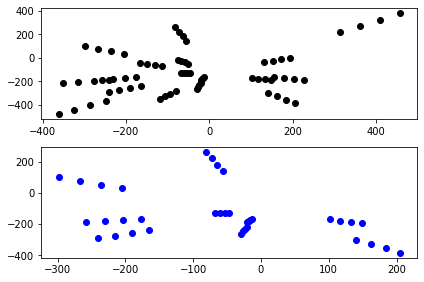

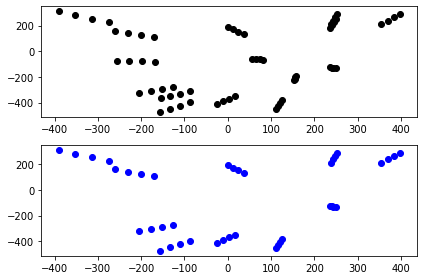

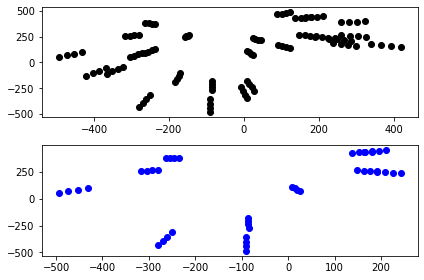

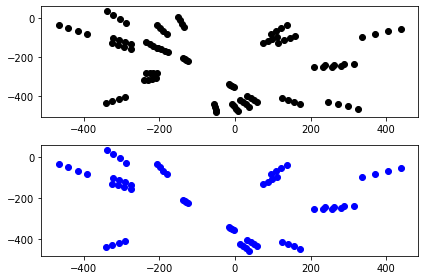

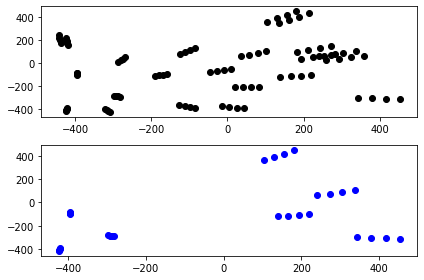

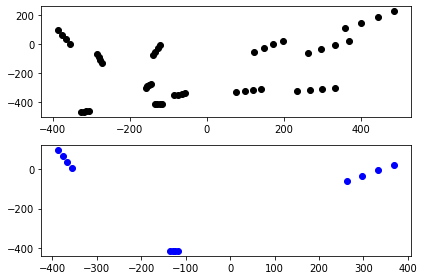

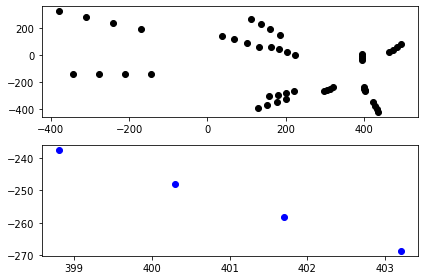

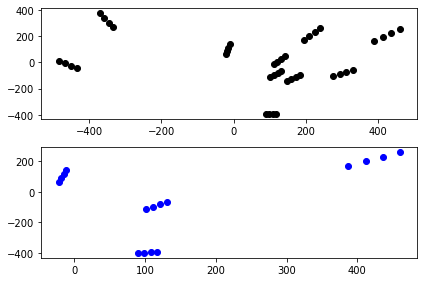

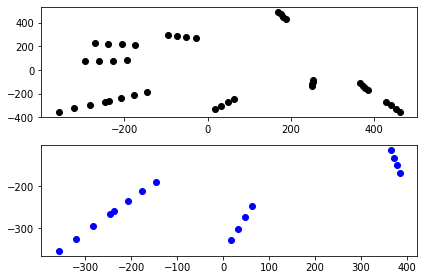

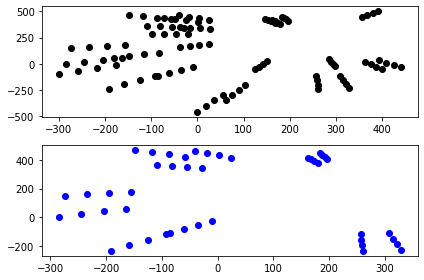

In [ ]:
#AutoencoderConv.graficar_rectas_3D('randoms_rastros0.csv','randoms_rastros0_mejorado.csv')
#plt.show()

for i in range(Num_experimentos):
  print("------------------ EVENTO "+str(i)+" --------------------------")
  archivo="randoms_rastros"+ str(i)+".csv"
  archivo_mejorado="randoms_rastros"+ str(i)+"_mejorado.csv"
  AutoencoderConv.graficar_disminicion_ruido_comparacion(archivo, archivo_mejorado)


## GRAFICA DE LA FUNCION DE PERDIDA Y EVOLUCIÓN DEL APRENDIZAJE

---





dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


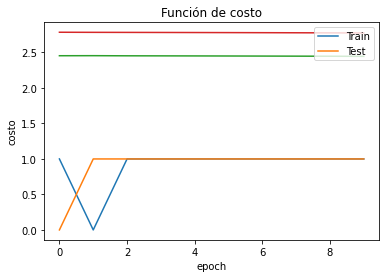

In [ ]:
history=H #trained_model
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de precisión')
plt.ylabel('precisión')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#resumen para la funcion de costo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de costo')
plt.ylabel('costo')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# 3 CLUSTERING JERÁRQUICO

## LIBRERIAS NECESARIAS

In [ ]:
# Clustering Jerárquico
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import collections
import math 
import itertools

# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


fig = plt.figure()

<Figure size 432x288 with 0 Axes>

## FUNCIONES DE VERIFICACION DE LINEALIDAD

In [ ]:
def graficar_rectas_3D(arrayX, arrayY, arrayZ):
    #fig = plt.figure()
    '''DIBUJANDO LOS 4 PLANOS'''
    ax = fig.add_subplot(111, projection="3d")
    #ax = axes3d(fig)   
  

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')


    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(0, 25)

    numero_rectas=int((arrayX[0].shape[0]-1)/4)#dividimos entre 4 pq tenemos '4' señales en los detectores

    contador_rectas=4 #determinar el numero de rectas que hay en este EVENTO
    for recta in range(0,numero_rectas):
        x = np.array([[ arrayX[0][0] ,arrayX[0][contador_rectas] ]]) 
        y = np.array([[ arrayY[0][0] ,arrayY[0][contador_rectas] ]])
        z = np.array([[ arrayZ[0][0] ,arrayZ[0][contador_rectas] ]]) 
        contador_rectas=contador_rectas+4
        # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
        # Es necesario que los datos esten contenidos en un array bi-dimensional
        '''DIBUJAR LA RECTA '''
        ax.plot_wireframe(x, y, z)
        '''IDENTIFICAR CON EL SIMBOLO "o" A TODOS LOS PUNTO'''
    
    ax.scatter(arrayX, arrayY, arrayZ, c='g', marker='o')
    ax.show()


def rouche_frobenius(matriz, ampliada):
  #
  #
  #Si rango (A) = rango (A*) = n (número de incógnitas), el sistema es compatible determinado (tiene una única solución).
  #
  #Si rango (A) = rango (A*) < n (número de incógnitas), el sistema es compatible indeterminado (tiene infinitas soluciones).
  #
  #Si rango (A) # rango (A*), el sistema es incompatible (no tiene solución).
  #
  #
  if(np.linalg.matrix_rank(matriz) == np.linalg.matrix_rank(ampliada) == 2):
    return True
  return False

def independencia_lineal(a,b):
  if(np.equal(a,b).all()):
    return False

  #VERIFICANDO SI SON PARALELOS
  cos_theta=a.dot(b) / (np.linalg.norm(a)*np.linalg.norm(b))
  theta=math.acos(cos_theta)
  if(theta==0.):
    return False

  return True


def gaussJordan(matriz, vector):
  matrix = np.array(matriz, dtype=np.float64)
  vector = np.array(vector, dtype=np.float64)

  m = len(vector)
  x = np.zeros(m)

  for k in range(0, m):
      for r in range(k+1, m):
          factor=(matrix[r,k]/matrix[k,k])
          vector[r]=vector[r]-(factor*vector[k])
          for c in range(0,m):
              matrix[r,c]=matrix[r,c]-(factor*matrix[k,c])

  x[m-1]=vector[m-1]/matrix[m-1, m-1]

  for r in range(m-2, -1, -1):
      suma = 0
      for c in range(0,m):
          suma=suma+matrix[r,c]*x[c]
      x[r]=(vector[r]-suma)/matrix[r, r]  
  return x


def pendiente(punto1,punto2):
  pen=(punto1[1]-punto2[1])/(punto1[0]-punto2[0])
  return pen

def verificar_es_recta(matriz_recta):

  #contamos cuantas veces se repite el plano, LA CONDICION SUFICIENTE PARA DETERMINAR QUE NO FORMAN UNA RECTA ES QUE LOS PUNTOS NO ENTAN EN DISTINTOS PLANOS (20,21,22,23)
  for llave, valor in dict(collections.Counter(matriz_recta[:,2])).items() :

    #SI SE REPITE AL MENOS DOS VECES "CUALQUIER PLANO", ESE CONJUNTO DE PUNTOS NO ES UN CANDIDATO POTENCIAL PARA CONFORMAR UNA RECTA 
    if valor==2:
      return False

  matriz_recta=matriz_recta[:,[0,1]]
  
  a=round(pendiente(matriz_recta[0],matriz_recta[1]),0)
  b=round(pendiente(matriz_recta[1],matriz_recta[2]),0)
  c=round(pendiente(matriz_recta[0],matriz_recta[2]),0)

  if len(matriz_recta)==4:
    d=round(pendiente(matriz_recta[0],matriz_recta[3]),0)
    e=round(pendiente(matriz_recta[1],matriz_recta[3]),0)
    f=round(pendiente(matriz_recta[2],matriz_recta[3]),0)

    if(a==b==c==d==e==f):
      #print(a,b,c,d,e,f)
      return True
    else:
      return False
  else:
    if(a==b==c):
      #print( a,b,c)
      return True
    else:
      return False

## FUNCION GRAFICACION DEL VERTICE IDENTIFICADO

In [ ]:
def graficar_rectas_resultantes(tensorRecta1, tensorRecta2, vertice_identificado, i):
    ''' RECIBE "las coordenadas de la recta 1" / "coordenadas de la recta 2" / numero_de_archivo '''
    fig = plt.figure()
    '''DIBUJANDO LOS 4 PLANOS DE LA CAMARA MATHUSLA'''
    ax = fig.add_subplot(111, projection="3d")
    #ax = axes3d(fig)   
    X, Y = np.meshgrid(range(-50,50), range(-50,50)) #DIBUJAMOS AL AREA DE EN x-y CON COMBINACIONES EN LOS EJES ENTRE EL RAGO (-50,50)

    Z1 = np.zeros((100,100))+20 #ESTABLECIENDO LA ALTURA DEL PLANO 1 Z=20

    Z2=Z1+1 #ESTABLECIENDO LA ALTURA DEL PLANO 2 Z=21

    Z3=Z1+2 #ESTABLECIENDO LA ALTURA DEL PLANO 3 Z=22

    Z4=Z1+3 #ESTABLECIENDO LA ALTURA DEL PLANO 4 Z=23

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    ax.plot_surface(X,Y, Z1, rstride=1, color='green')
    ax.plot_surface(X,Y, Z2, rstride=1, color='red')
    ax.plot_surface(X,Y, Z3, rstride=1, color='blue')
    ax.plot_surface(X,Y, Z4, rstride=1, color='yellow')

    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(0, 25)
    '''DIBUJANDO LOS 4 PLANOS DE LA CAMARA MATHUSLA'''

    #almacenamos las coordenadas X Y Z para graficar en la funcion scatter
    lista_coordX=list([])
    lista_coordY=list([])
    lista_coordZ=list([])


    for recta1 in tensorRecta1: # recorre todas las rectas del tensor 1
        x = np.array([[ vertice_identificado[0]/100 ,recta1[0]/100 ]]) #np.array([[-40,2]])
        y = np.array([[ vertice_identificado[1]/100 ,recta1[1]/100 ]]) #np.array([[-40,6]])
        z = np.array([[ vertice_identificado[2]/100 ,recta1[2]/100 ]]) #np.array([[5,25]])

        lista_coordX.append(x)
        lista_coordY.append(y)
        lista_coordZ.append(z)

        # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
        # Es necesario que los datos esten contenidos en un array bi-dimensional
        '''DIBUJAR LA RECTA '''
        ax.plot_wireframe(x, y, z)
        '''IDENTIFICAR CON EL SIMBOLO "o" A TODOS LOS PUNTO'''
    
    for recta2 in tensorRecta2: # recorre todas las rectas del tensor 1
        x = np.array([[ vertice_identificado[0]/100 ,recta2[0]/100 ]]) #np.array([[-40,2]])
        y = np.array([[ vertice_identificado[1]/100 ,recta2[1]/100 ]]) #np.array([[-40,6]])
        z = np.array([[ vertice_identificado[2]/100 ,recta2[2]/100 ]]) #np.array([[5,25]])

        lista_coordX.append(x)
        lista_coordY.append(y)
        lista_coordZ.append(z)

        # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
        # Es necesario que los datos esten contenidos en un array bi-dimensional
        '''DIBUJAR LA RECTA '''
        ax.plot_wireframe(x, y, z)
        '''IDENTIFICAR CON EL SIMBOLO "o" A TODOS LOS PUNTO'''
    
    print(lista_coordX,lista_coordY,lista_coordZ)
    ax.scatter(lista_coordX,lista_coordY,lista_coordZ, c='g', marker='o')
    #ax.scatter([21,12,23,43,48],[43,23,44,2,35],[14,31,43,24,43], c='g', marker='o')
    
    #for ii in range(0,300):
    ax.view_init(elev=4.5, azim=310)
    fig.savefig("resultado%d.png" % i)


## INTERSECTANDO RECTAS RECONSTRUIDAS

In [ ]:

def punto_de_interseccion(matriz1, matriz2):
  #DEVUELVE EL PUNTO COORDENADO X Y Z DE LA INTERSECCION DE LAS RECTAS VERIFICADAS

  #PUNTO DE ORIGEN DE LA RECTA A CONSTRUIR
  #RECTA R
  A=matriz1[0]
  B=matriz1[len(matriz1)-1]
  
  #RECTA L
  C=matriz2[0]
  D=matriz2[len(matriz2)-1]

  #FORMANDO DOS ecuaciones de RECTAS
  ##formando los vectores canonicos de las rectas
  vector_canonicoR=(B-A)
  vector_canonicoL=(D-C)
  

  ##comprobando la independencia lineal
  if(not independencia_lineal(vector_canonicoR, vector_canonicoL)):
    return(  "none"  ,  "none"  )


  #IGUALANDO LAS RECTAS R Y L => t*VR - m*VL = C - A
  #print(vector_canonicoR)
  #print(vector_canonicoL)

  canonico=list([])

  for coord in vector_canonicoL:
    canonico.append(coord*(-1))
  vector_canonicoL=np.array(canonico)

  matriz_parametros=np.transpose(np.array([vector_canonicoR, vector_canonicoL])[:,[0,1]])
  

  igualdad=list([] )
  igualdad.append( (C-A)[0])
  igualdad.append( (C-A)[1])

  ###############
  #
  #
  # TEOREMA DE ROUCHE - FROBENIUS 
  #
  #
  #########
  matriz_parametros_ampliada=np.array(np.insert(matriz_parametros, matriz_parametros.shape[1], np.array(igualdad), 1))

  if not rouche_frobenius(matriz_parametros, matriz_parametros_ampliada):
    return(  "none"  ,  "none"  )

  #print( matriz_parametros, np.array(igualdad))

  t,m = gaussJordan( matriz_parametros, np.array(igualdad) )
  #print("t_m", t, m)

  #reemplazando en las ecuaciones originales PARA PROYECTAR LA INTERESECCION
  ##ecuaciones simetricas
  
  ### ax + t VRx, ay + t VRy, az + t VRz
  vertex_R=list( [  round(A[0]+(t*vector_canonicoR[0]))  ,  round(A[1]+(t*vector_canonicoR[1]))  ,  round(A[2]+(t*vector_canonicoR[2]))  ])

  ### cx - m*(- VLx), cy - m*(- VLy), cz - m*(- VLz)
  vertex_L=list(  [  round(C[0]-(m*vector_canonicoL[0]))  ,  round(C[1]-(m*vector_canonicoL[1]))  ,  round(C[2]-(m*vector_canonicoL[2]))  ]  )

  return vertex_R,vertex_L

In [ ]:
tridimensional=np.array(
[[-2512.95,  -395.73,  2000.  ],
 [-2460.15, -1914.11,  2000.  ],
 [-1161.11, -1676.31,  2000.  ],
 [-1587.69, -2446.63,  2000.  ],
 [-3927.5,  -2225.65,  2000.  ],
 [-1388.34,   -59.32,  2000.  ],
 [-2583.4,  -2067.25,  2000.  ],
 [-1570.39, -2722.,    2000.  ],
 [-2545.26, -1905.48,  2000.  ],
 [-3728.1,   1572.63,  2000.  ],
 [-3801.03,  1393.45,  2000.  ],
 [-2303.82, -1916.26,  2000.  ],
 [-3218.87,  -829.45,  2000.  ],
 [-2594.08,  2227.89,  2000.  ],
 [-2530.41,   984.13,  2000.  ],
 [ -954.4,   -548.51,  2000.  ],
 [-4150.62, -1870.77,  2000.  ],
 [-2089.03, -3386.86,  2000.  ],
 [-2389.92,  -191.05,  2100.  ],
 [-2328.8,  -1948.6,   2100.  ],
 [ -825.14, -1673.35,  2100.  ],
 [-1318.9,  -2565.01,  2100.  ],
 [-4027.26, -2309.21,  2100.  ],
 [-1088.15,   198.35,  2100.  ],
 [-2471.45, -2125.87,  2100.  ],
 [-1298.84, -2883.77,  2100.  ],
 [-2427.3,  -1938.61,  2100.  ],
 [-3796.46,  2087.35,  2100.  ],
 [-3880.88,  1879.96,  2100.  ],
 [-2147.83, -1951.09,  2100.  ],
 [-3207.03,  -693.09,  2100.  ],
 [-2483.82,  2845.84,  2100.  ],
 [-2410.11,  1406.19,  2100.  ],
 [ -585.86,  -367.9,   2100.  ],
 [-4285.55, -1898.44,  2100.  ],
 [-1899.2,  -3653.34,  2100.  ],
 [-2266.88,    13.62,  2200.  ],
 [-2197.44, -1983.09,  2200.  ],
 [ -489.14, -1670.38,  2200.  ],
 [-1050.1,  -2683.39,  2200.  ],
 [-4127.04, -2392.78,  2200.  ],
 [ -787.96,   456.02,  2200.  ],
 [-2359.51, -2184.48,  2200.  ],
 [-1027.33, -3045.52,  2200.  ],
 [-2309.35, -1971.74,  2200.  ],
 [-3864.82,  2602.08,  2200.  ],
 [-3960.74,  2366.48,  2200.  ],
 [-1991.84, -1985.92,  2200.  ],
 [-3195.18,  -556.73,  2200.  ],
 [-2373.56,  3463.79,  2200.  ],
 [-2289.82,  1828.21,  2200.  ],
 [ -217.32,  -187.28,  2200.  ],
 [-4420.47, -1926.11,  2200.  ],
 [-1709.38, -3919.83,  2200.  ],
 [-2143.82  , 218.32 , 2300.  ],
 [-2066.06 ,-2017.59  ,2300.  ],
 [ -153.17 ,-1667.42  ,2300.  ],
 [ -781.3  ,-2801.76  ,2300.  ],
 [-4226.81 ,-2476.34  ,2300.  ],
 [ -487.77  , 713.69  ,2300.  ],
 [-2247.55 ,-2243.1   ,2300.  ],
 [ -755.82 ,-3207.27  ,2300.  ],
 [-2191.4  ,-2004.88  ,2300.  ],
 [-3933.18 , 3116.81  ,2300.  ],
 [-4040.59 , 2852.99  ,2300.  ],
 [-1835.85 ,-2020.75  ,2300.  ],
 [-3183.33  ,-420.37  ,2300.  ],
 [-2263.29 , 4081.74  ,2300.  ],
 [-2169.52 , 2250.26  ,2300.  ],
 [  151.25    ,-6.65  ,2300.  ],
 [-4555.38 ,-1953.77  ,2300.  ],
 [-1519.55 ,-4186.31  ,2300.  ]]
)

## DETERMINACIÓN ESPACIAL DEL VERTICE DESPLAZADO

In [ ]:
def determinando_ubic_espacial_vertex(tridimensional):

  X=np.array(tridimensional[:,[0,1]])

  #dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

  N_CLUSTER=2
  rectas_completas=0
  sw=True
  may=0
  while (sw):
    hc = AgglomerativeClustering(n_clusters = N_CLUSTER,affinity = 'euclidean',linkage = 'ward')
    y_hc = hc.fit_predict(X)

    clase1=collections.Counter(y_hc) # crea diccionario por cada clase, clase-0: 7; clase-1: 9
    clase1=clase1.values()
    rectas_completas=list(clase1).count(4) ##cuantos cluster hay de 4 elementos?
    rectas_semicompletas=list(clase1).count(3) ##cuantos cluster hay de 3 elementos?

    #print(rectas_completas, rectas_semicompletas)

    if rectas_completas+rectas_semicompletas>=may:#la mayor cantidad de posibles rectas detectadas
      may=rectas_completas+rectas_semicompletas
    else:
      sw=False
    N_CLUSTER+=1

  #A LA MATRIZ DE PUNTOS ESPACIALES AGREGAMOS UNA COLUMNA QUE INDICA A QUE CLUSTER PERTENCE, DONDE CADA FILA SERA X,Y,Z,"a que cluster pertenece"
  matriz= np.array(np.insert(tridimensional, tridimensional.shape[1], np.array(y_hc), 1))

  #ORDENAMOS LA MATRIZ DE PUNTOS ESPACIALES SEGUN LA COLUMANS DE CLASE, ORDENAMOS SEGUN EL NUMOERO DE CLASE
  matriz_ordenada=matriz[matriz[:,3].argsort()]

  #muestra el diccionario de clases y "cuantos elementos perteneces a esa clase"
  diccionario_rectas_comp_semicomp=collections.Counter(matriz_ordenada[:,3])

  ##convirtiendo a diccionario
  diccionario_rectas_comp_semicomp=dict(diccionario_rectas_comp_semicomp)

  #SE CREA UN LISTA PARA AGREGAR LA CLASE DE CLUSTER QUE CONTIENE RECTAS CANDIDATAS A RECONSTRUCCION
  lista_clase_cluster=list([])
  for numero_cluster, valor in diccionario_rectas_comp_semicomp.items():
    if valor==4 or valor==3 :
      #SI TIENE 3 O 4 PUNTOS ESPACIALES DENTRO EL CLUSTER, AGREGAMOS A LA LISTA DE CLASES
      lista_clase_cluster.append(numero_cluster)


  #LISTA DE MATRICES QUE CONTIENEN RECTAS
  lista_matrices_rectas_verificadas=list([])

  #SE FILTRA DE TODA LA MATRIZ_ORDENADA SEGUN CLUSTER LAS FILAS QUE CONTENGAN LAS RECTAS CANDIDATAS PARA RECONSTRUCCION
  print("LISTA CLASE CLUSTER >>> ",lista_clase_cluster)

  for cluster in lista_clase_cluster:
    #FILTRAMOS LAS FILAS DE LA MATRIZ DE PUNTOS ESPACIALES SEGUN LA CLASE DE CLUSTER
    matriz_de_rectas=matriz_ordenada[matriz_ordenada[:,3]==cluster]
    print("MATRIZ RECTAS SEGUN CLUSTER >>> ",matriz_de_rectas)


    #ENVIAMOS A VERIFICAR SI LA LISTA DE PUNTOS EN LA MATRIZ_dE_RECTAS FORMAN UNA RECTA
    #DEMOSTRAR SI AL MENOS 3 PUNTOS PERTENECEN A LA MISMA RECTA O SON COLINEALES
    if verificar_es_recta(matriz_de_rectas): ############################################################verificar si tiene regresion lineal
      lista_matrices_rectas_verificadas.append(matriz_de_rectas[:,[0,1,2]])


  print("LISTA MATRICES DE RECTAS VERIFICADAS  >>> ",lista_matrices_rectas_verificadas)

  indices=list([])

  for x in range(0, len(lista_matrices_rectas_verificadas)):
    indices.append(x)

  lista_combinaciones = list(itertools.combinations(indices, 2))

  existe=False

  print("ENTRANDO A LA VERIFICACION")
  for x, y in lista_combinaciones:
    vertex_R, vertex_L = punto_de_interseccion(lista_matrices_rectas_verificadas[x],lista_matrices_rectas_verificadas[y])
    #comprobando son rectas validas __ dependencia lineal entre los puntos -- y que tienen un punto unico solucion o interseccion

    print("____>>>>>>>>>>>",vertex_R, vertex_L)

    if ( (vertex_R[0] == vertex_L[0]) and (vertex_R[1] == vertex_L[1]) ) and vertex_R!= "none":

      #GRAFICANDO LAS RECTAS Y EL PUNTO IDENTIFICADO ..... las rectas que se intersectan y ademas repiten un vertice en comun
      graficar_rectas_resultantes(lista_matrices_rectas_verificadas[x] , lista_matrices_rectas_verificadas[y],vertex_R,0)
      existe=True
      break

  ##############        MOSTRAR EN 3D LAS RECTAS RECONSTRUIDAS Y LA UBICACION DEL VERTICE DESPLAZADO

  # SI EXISTE VERTICE DETECTADO O IDENTIFICADO 
  if existe:
    print("##########################################################33")
    print(">           VERTICE RECONSTRUIDO ",vertex_R, vertex_L)
    print("##########################################################33")
    print("NUMERO DE CLUSTERS", N_CLUSTER)
  else:
    print("NO SE HA PODIDO DETERMINAR ALGUN VERTICE")

  #print(gaussJordan([[4,-10],[5,-11]],[6,6]))

  '''
  MOSTRANDO LOS PUNTOS DE LAS RECTAS VERIFICADAS EN 3 DIMENSIONES

  fig = plt.figure()
  ax = fig.add_subplot(111, projection="3d")
  for recta in lista_matrices_rectas_verificadas:
    ax.scatter(recta[:,0], recta[:,1], recta[:,2], c='g', marker='o')

  plt.show()

  '''
  lista_colores= list(['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'brown', 'orange', 'crimson', 'lime','teal', 'coral', 'palegreen','peru', 'chocolate','dodgerblue', 'lightseagreen', 'springreen','seagreen'])

  # Visualizando los clusters
  for nro_cluster in range(0, N_CLUSTER):
    nro_cluster=int(nro_cluster)
    etiqueta="Cluster " + str(nro_cluster)
    plt.scatter(X[y_hc == nro_cluster, 0], X[y_hc == nro_cluster, 1], s = 100, c = lista_colores[nro_cluster], label = etiqueta)
    print("cluster = ", nro_cluster, X[y_hc == nro_cluster, 0], X[y_hc == nro_cluster, 1])
    

  '''
  plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
  plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
  plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
  plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
  plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
  plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
  plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'black', label = 'Cluster 7')
  plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'brown', label = 'Cluster 8')
  plt.scatter(X[y_hc == 8, 0], X[y_hc == 8, 1], s = 100, c = 'orange', label = 'Cluster 9')
  plt.scatter(X[y_hc == 9, 0], X[y_hc == 9, 1], s = 100, c = 'crimson', label = 'Cluster 10')
  plt.scatter(X[y_hc == 10, 0], X[y_hc == 10, 1], s = 100, c = 'lime', label = 'Cluster 11')
  plt.scatter(X[y_hc == 11, 0], X[y_hc == 11, 1], s = 100, c = 'teal', label = 'Cluster 12')

  '''


  plt.scatter(X[:, 0], X[:, 1], s = 25, c = 'gray', label = 'Todos los rastros')


  plt.title('Proyeccion de señales sobre el plano X-Z ')
  plt.ylabel('Eje X (-50-50)')
  plt.xlabel('Eje Z (-50-50)')
  plt.legend(loc='lower right')
  plt.show()


In [ ]:

def get_lista_matriz_desintegraciones_mejoradas():
  lista_desintegraciones = []
  for i in range(Num_experimentos):
    placa_fusion=np.zeros((1000,1000), dtype=int)
    nombre_archivo="randoms_rastros"+str(i)+"_mejorado.csv"
    desintegracion = pd.read_csv(nombre_archivo)
    desintegracion = np.array(desintegracion.copy())

    lista_desintegraciones.append(np.delete(desintegracion, 0,axis=1)) #eliminanado la primera columna
  
  lista_desintegraciones = np.array(lista_desintegraciones)
  return np.array(lista_desintegraciones)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


(36, 3)
[[-1764. -1679.  2000.]
 [-2044.   290.  2000.]
 [-1649. -2399.  2000.]
 [ -557.  1395.  2000.]
 [ -466. -1293.  2000.]
 [ -206. -2194.  2000.]
 [ 1016. -1717.  2000.]
 [ 1407. -3026.  2000.]
 [ -139. -1671.  2000.]
 [ 1623. -3302.  2100.]
 [-2034. -1747.  2100.]
 [ -537. -1302.  2100.]
 [ -160. -1738.  2100.]
 [ -237. -2341.  2100.]
 [-1903. -2578.  2100.]
 [-2358.   525.  2100.]
 [ 1172. -1791.  2100.]
 [ -642.  1799.  2100.]
 [ 1329. -1865.  2200.]
 [-2156. -2756.  2200.]
 [-2305. -1815.  2200.]
 [ 1840. -3577.  2200.]
 [ -609. -1310.  2200.]
 [ -181. -1805.  2200.]
 [ -269. -2488.  2200.]
 [-2672.   760.  2200.]
 [ -727.  2204.  2200.]
 [ -812.  2608.  2300.]
 [ 2056. -3852.  2300.]
 [ 1485. -1938.  2300.]
 [ -680. -1319.  2300.]
 [-2409. -2935.  2300.]
 [ -202. -1872.  2300.]
 [ -300. -2635.  2300.]
 [-2576. -1883.  2300.]
 [-2986.   995.  2300.]]
LISTA CLASE CLUSTER >>>  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0]
MATRIZ RECTAS SEGUN CLUSTER >>>  [[-2986.   995.  2300.     0

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


[array([[  0.1 , -29.86]]), array([[  0.1 , -23.58]]), array([[  0.1 , -26.72]]), array([[  0.1 , -20.44]]), array([[ 0.1 , 20.56]]), array([[ 0.1 , 14.07]]), array([[ 0.1 , 16.23]]), array([[ 0.1, 18.4]])] [array([[-12.47,   9.95]]), array([[-12.47,   5.25]]), array([[-12.47,   7.6 ]]), array([[-12.47,   2.9 ]]), array([[-12.47, -38.52]]), array([[-12.47, -30.26]]), array([[-12.47, -33.02]]), array([[-12.47, -35.77]])] [array([[13.46, 23.  ]]), array([[13.46, 21.  ]]), array([[13.46, 22.  ]]), array([[13.46, 20.  ]]), array([[13.46, 23.  ]]), array([[13.46, 20.  ]]), array([[13.46, 21.  ]]), array([[13.46, 22.  ]])]
##########################################################33
>           VERTICE RECONSTRUIDO  [10, -1247, 1346] [10, -1247, 1353]
##########################################################33
NUMERO DE CLUSTERS 11
cluster =  0 [-2044. -2358. -2672. -2986.] [290. 525. 760. 995.]
cluster =  1 [1407. 1623. 1840. 2056.] [-3026. -3302. -3577. -3852.]
cluster =  2 [1016. 1172. 1

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


[array([[ 18.16, -26.07]]), array([[ 18.16, -17.04]]), array([[ 18.16, -23.06]]), array([[ 18.16, -20.05]]), array([[ 18.16, -20.47]]), array([[ 18.16, -12.58]]), array([[ 18.16, -17.84]]), array([[ 18.16, -15.21]])] [array([[-9.4 , 16.02]]), array([[-9.4 , 10.82]]), array([[-9.4 , 14.29]]), array([[-9.4 , 12.56]]), array([[ -9.4 , -32.32]]), array([[ -9.4 , -27.63]]), array([[ -9.4 , -30.76]]), array([[ -9.4, -29.2]])] [array([[ 8.3, 23. ]]), array([[ 8.3, 20. ]]), array([[ 8.3, 22. ]]), array([[ 8.3, 21. ]]), array([[ 8.3, 23. ]]), array([[ 8.3, 20. ]]), array([[ 8.3, 22. ]]), array([[ 8.3, 21. ]])]
##########################################################33
>           VERTICE RECONSTRUIDO  [1816, -940, 830] [1816, -940, 831]
##########################################################33
NUMERO DE CLUSTERS 12
cluster =  0 [-1704. -2005. -2306. -2607.] [1082. 1256. 1429. 1602.]
cluster =  1 [-1258. -1521. -1784. -2047.] [-2763. -2920. -3076. -3232.]
cluster =  2 [ -866. -1095. -1325. 

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


[array([[ -8.95, -26.99]]), array([[ -8.95, -27.98]]), array([[ -8.95, -25.01]]), array([[ -8.95, -26.  ]]), array([[ -8.95, -43.12]]), array([[ -8.95, -45.22]]), array([[ -8.95, -49.43]]), array([[ -8.95, -47.33]])] [array([[ 33.13, -39.38]]), array([[ 33.13, -43.37]]), array([[ 33.13, -31.42]]), array([[ 33.13, -35.4 ]]), array([[33.13,  9.76]]), array([[33.13,  8.32]]), array([[33.13,  5.43]]), array([[33.13,  6.88]])] [array([[ 3.78, 22.  ]]), array([[ 3.78, 23.  ]]), array([[ 3.78, 20.  ]]), array([[ 3.78, 21.  ]]), array([[ 3.78, 20.  ]]), array([[ 3.78, 21.  ]]), array([[ 3.78, 23.  ]]), array([[ 3.78, 22.  ]])]
##########################################################33
>           VERTICE RECONSTRUIDO  [-895, 3313, 378] [-895, 3313, 377]
##########################################################33
NUMERO DE CLUSTERS 11
cluster =  0 [-2501. -2600. -2699. -2798.] [-3142. -3540. -3938. -4337.]
cluster =  1 [1902. 1477. 2075. 1624. 2247. 1770. 1917. 2420.] [2501. 2652. 2450. 2611

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


[array([[ -7.85, -46.67]]), array([[ -7.85, -44.13]]), array([[ -7.85, -39.04]]), array([[ -7.85, -41.59]]), array([[-7.85, 37.05]]), array([[-7.85, 40.41]]), array([[-7.85, 33.68]])] [array([[-27.61,  -3.46]]), array([[-27.61,  -5.04]]), array([[-27.61,  -8.2 ]]), array([[-27.61,  -6.62]]), array([[-27.61,  -8.29]]), array([[-27.61,  -6.83]]), array([[-27.61,  -9.74]])] [array([[ 7.72, 23.  ]]), array([[ 7.72, 22.  ]]), array([[ 7.72, 20.  ]]), array([[ 7.72, 21.  ]]), array([[ 7.72, 21.  ]]), array([[ 7.72, 22.  ]]), array([[ 7.72, 20.  ]])]
##########################################################33
>           VERTICE RECONSTRUIDO  [-785, -2761, 772] [-785, -2761, 768]
##########################################################33
NUMERO DE CLUSTERS 18
cluster =  0 [-3904. -4159. -4413. -4667.] [-820. -662. -504. -346.]
cluster =  1 [3368. 3705. 4041.] [-974. -829. -683.]
cluster =  2 [2628. 2884. 2566. 2799. 3139.] [-2416. -2390. -2503. -2484. -2363.]
cluster =  3 [ 948.  738.  861

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


[array([[-39.52,  10.45]]), array([[-39.52,  18.08]]), array([[-39.52,  12.99]]), array([[-39.52,  15.54]]), array([[-39.52,  45.44]]), array([[-39.52,  34.18]]), array([[-39.52,  41.69]]), array([[-39.52,  37.94]])] [array([[-22.54,  36.07]]), array([[-22.54,  45.03]]), array([[-22.54,  39.06]]), array([[-22.54,  42.04]]), array([[-22.54, -31.15]]), array([[-22.54, -30.01]]), array([[-22.54, -30.77]]), array([[-22.54, -30.39]])] [array([[ 0.36, 20.  ]]), array([[ 0.36, 23.  ]]), array([[ 0.36, 21.  ]]), array([[ 0.36, 22.  ]]), array([[ 0.36, 23.  ]]), array([[ 0.36, 20.  ]]), array([[ 0.36, 22.  ]]), array([[ 0.36, 21.  ]])]
##########################################################33
>           VERTICE RECONSTRUIDO  [-3952, -2254, 36] [-3952, -2254, 34]
##########################################################33
NUMERO DE CLUSTERS 9
cluster =  0 [1045. 1299. 1554. 1808.] [3607. 3906. 4204. 4503.]
cluster =  1 [3418. 3794. 4169. 4544.] [-3001. -3039. -3077. -3115.]
cluster =  2 [13

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


[array([[-21.94, -35.6 ]]), array([[-21.94, -36.6 ]]), array([[-21.94, -37.61]]), array([[-21.94, -38.61]]), array([[-21.94, -13.53]]), array([[-21.94, -12.92]]), array([[-21.94, -12.3 ]]), array([[-21.94, -11.68]])] [array([[-41.32,   0.4 ]]), array([[-41.32,   3.46]]), array([[-41.32,   6.52]]), array([[-41.32,   9.59]]), array([[-41.32, -41.27]]), array([[-41.32, -41.27]]), array([[-41.32, -41.26]]), array([[-41.32, -41.26]])] [array([[ 6.38, 20.  ]]), array([[ 6.38, 21.  ]]), array([[ 6.38, 22.  ]]), array([[ 6.38, 23.  ]]), array([[ 6.38, 20.  ]]), array([[ 6.38, 21.  ]]), array([[ 6.38, 22.  ]]), array([[ 6.38, 23.  ]])]
##########################################################33
>           VERTICE RECONSTRUIDO  [-2194, -4132, 638] [-2194, -4132, 637]
##########################################################33
NUMERO DE CLUSTERS 5
cluster =  0 [-3560. -3660. -3761. -3861.] [ 40. 346. 652. 959.]
cluster =  1 [3330. 3684.] [-71. 188.]
cluster =  2 [-1353. -1292. -1230. -1168.] [

ValueError: ignored

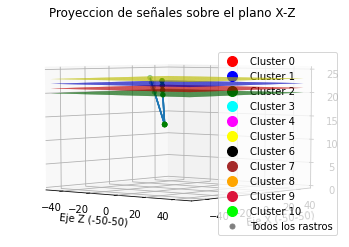

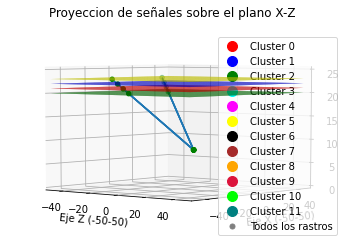

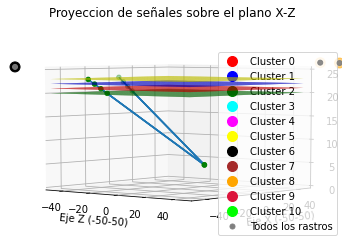

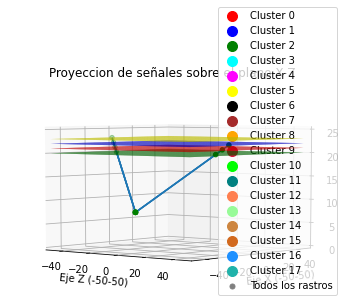

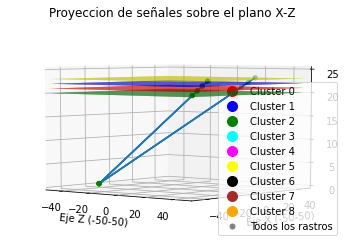

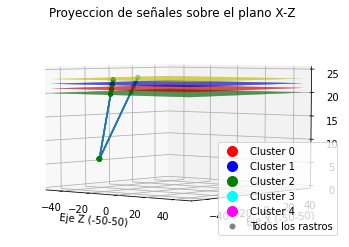

In [ ]:
# Carga del conjunto de datos

####dataset = pd.read_csv('Clientes_Tienda.csv')
####X = dataset.iloc[:, [3, 4]].values


lista_desintegraciones_mejor = get_lista_matriz_desintegraciones_mejoradas()

#print(tridimensional)
#determinando_ubic_espacial_vertex(tridimensional)
for xeven in range(Num_experimentos):
  print(lista_desintegraciones_mejor[xeven].shape)

  matriz=lista_desintegraciones_mejor[xeven]*10
  
  matriz=np.array(matriz[matriz[:,2].argsort()]) ##ordenando por la columna de z
  
  print(matriz)
  determinando_ubic_espacial_vertex(matriz)

  print("_____________________________________________________________________________________________")
  print("_____________________________________________________________________________________________")
  print("_____________________________________________________________________________________________")



###INSPECCION MANUAL !!!!!
#########print(lista_desintegraciones_mejor[0].shape)
#########matriz=lista_desintegraciones_mejor[0]*10
#########matriz=np.array(matriz[matriz[:,2].argsort()]) ##ordenando por la columna de z
#########print(matriz)
#########determinando_ubic_espacial_vertex(matriz)

## RESULTADOS